In [1]:
import pandas as pd
import numpy as np

1 . Train
2 . Validated
3 . Test

In [31]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [32]:
model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
variables = ['Sex_binary', 'Age']

def transform_sex(value):
    if value == 'female':
        return 1
    else:
        return 0
    
train['Sex_binary'] = train['Sex'].map(transform_sex)


X = train[variables]
y = train['Survived']


X = X.fillna(-1)
y = y.fillna(-1)

model.fit(X,y)

test['Sex_binary'] = test['Sex'].map(transform_sex)

X_prev = test[variables]
X_prev = X_prev.fillna(-1)
X_prev.head()

p = model.predict(X_prev)

In [6]:
X_false = np.arange(10)
X_false

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.random.seed(1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5)

In [8]:
X_train.head()

,Sex_binary,Age
394,1,24.00
851,0,74.00
373,0,22.00
523,1,44.00
78,0,0.83


In [9]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [10]:
model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=0)

In [11]:
p = model.predict(X_valid)

In [12]:
np.mean(y_valid == p) #accuracy

0.7466367713004485

In [13]:
p = (X_valid['Sex_binary'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

## Cross Validation

In [14]:
X_false

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
from sklearn.model_selection import KFold

In [16]:
k = KFold(3, shuffle=True, random_state=0)
for rows_train, rows_valid in k.split(X_false):
    print("Train:", rows_train)
    print("Valid:", rows_valid)
    print("")

Train: [0 1 3 5 6 7]
Valid: [2 4 8 9]

Train: [0 2 3 4 5 8 9]
Valid: [1 6 7]

Train: [1 2 4 6 7 8 9]
Valid: [0 3 5]



In [18]:
results = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
    
for rows_train, rows_valid in kf.split(X):
    print("Train:", rows_train.shape[0])
    print("Valid:", rows_valid.shape[0])
    X_train, X_valid = X.iloc[rows_train], X.iloc[rows_valid]
    y_train, y_valid = y.iloc[rows_train], y.iloc[rows_valid]
    model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results.append(acc)
    print("Acc:", acc)
    print("")

Train: 445
Valid: 446
Acc: 0.7511210762331838

Train: 446
Valid: 445
Acc: 0.7617977528089888

Train: 445
Valid: 446
Acc: 0.7533632286995515

Train: 446
Valid: 445
Acc: 0.7595505617977528

Train: 445
Valid: 446
Acc: 0.7690582959641256

Train: 446
Valid: 445
Acc: 0.7573033707865169

Train: 445
Valid: 446
Acc: 0.7399103139013453

Train: 446
Valid: 445
Acc: 0.7595505617977528

Train: 445
Valid: 446
Acc: 0.7354260089686099

Train: 446
Valid: 445
Acc: 0.797752808988764

Train: 445
Valid: 446
Acc: 0.7690582959641256

Train: 446
Valid: 445
Acc: 0.7640449438202247

Train: 445
Valid: 446
Acc: 0.7757847533632287

Train: 446
Valid: 445
Acc: 0.7573033707865169

Train: 445
Valid: 446
Acc: 0.7556053811659192

Train: 446
Valid: 445
Acc: 0.7640449438202247

Train: 445
Valid: 446
Acc: 0.7443946188340808

Train: 446
Valid: 445
Acc: 0.7595505617977528

Train: 445
Valid: 446
Acc: 0.7533632286995515

Train: 446
Valid: 445
Acc: 0.7640449438202247



In [19]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\users\gloom\documents\kaggle\venv\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
np.mean(results)

0.759601451100922

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

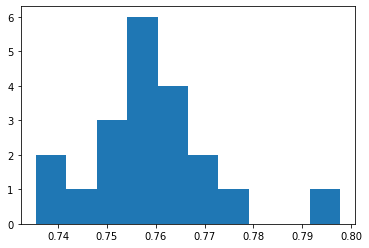

In [21]:
pylab.hist(results)

## New Variables

In [22]:
#previous model= 0.759601451100922

In [23]:
variables = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [24]:
X = train[variables].fillna(-1)
y = train['Survived']

In [25]:
results = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
    
for rows_train, rows_valid in kf.split(X):
    print("Train:", rows_train.shape[0])
    print("Valid:", rows_valid.shape[0])
    X_train, X_valid = X.iloc[rows_train], X.iloc[rows_valid]
    y_train, y_valid = y.iloc[rows_train], y.iloc[rows_valid]
    model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results.append(acc)
    print("Acc:", acc)
    print("")

Train: 445
Valid: 446
Acc: 0.7869955156950673

Train: 446
Valid: 445
Acc: 0.7797752808988764

Train: 445
Valid: 446
Acc: 0.827354260089686

Train: 446
Valid: 445
Acc: 0.8179775280898877

Train: 445
Valid: 446
Acc: 0.7847533632286996

Train: 446
Valid: 445
Acc: 0.7842696629213484

Train: 445
Valid: 446
Acc: 0.8161434977578476

Train: 446
Valid: 445
Acc: 0.7842696629213484

Train: 445
Valid: 446
Acc: 0.8004484304932735

Train: 446
Valid: 445
Acc: 0.8

Train: 445
Valid: 446
Acc: 0.8183856502242153

Train: 446
Valid: 445
Acc: 0.802247191011236

Train: 445
Valid: 446
Acc: 0.8116591928251121

Train: 446
Valid: 445
Acc: 0.8067415730337079

Train: 445
Valid: 446
Acc: 0.820627802690583

Train: 446
Valid: 445
Acc: 0.7887640449438202

Train: 445
Valid: 446
Acc: 0.8385650224215246

Train: 446
Valid: 445
Acc: 0.8044943820224719

Train: 445
Valid: 446
Acc: 0.7982062780269058

Train: 446
Valid: 445
Acc: 0.8112359550561797



(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

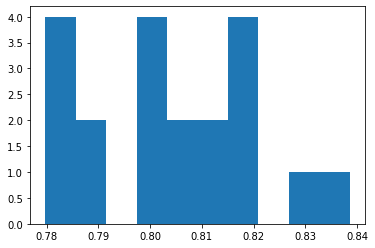

In [26]:
pylab.hist(results)

In [27]:
np.mean(results)

0.8041457147175896

## Retrain the model

In [28]:
X.head()

,Sex_binary,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
test[variables].head()

,Sex_binary,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [34]:
model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
model.fit(X, y)

p = model.predict(test[variables].fillna(-1))

## Error analysis

In [35]:
results = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
    
for rows_train, rows_valid in kf.split(X):
    print("Train:", rows_train.shape[0])
    print("Valid:", rows_valid.shape[0])
    X_train, X_valid = X.iloc[rows_train], X.iloc[rows_valid]
    y_train, y_valid = y.iloc[rows_train], y.iloc[rows_valid]
    model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results.append(acc)
    print("Acc:", acc)
    print("")

Train: 445
Valid: 446
Acc: 0.7511210762331838

Train: 446
Valid: 445
Acc: 0.7617977528089888

Train: 445
Valid: 446
Acc: 0.7533632286995515

Train: 446
Valid: 445
Acc: 0.7595505617977528

Train: 445
Valid: 446
Acc: 0.7690582959641256

Train: 446
Valid: 445
Acc: 0.7573033707865169

Train: 445
Valid: 446
Acc: 0.7399103139013453

Train: 446
Valid: 445
Acc: 0.7595505617977528

Train: 445
Valid: 446
Acc: 0.7354260089686099

Train: 446
Valid: 445
Acc: 0.797752808988764

Train: 445
Valid: 446
Acc: 0.7690582959641256

Train: 446
Valid: 445
Acc: 0.7640449438202247

Train: 445
Valid: 446
Acc: 0.7757847533632287

Train: 446
Valid: 445
Acc: 0.7573033707865169

Train: 445
Valid: 446
Acc: 0.7556053811659192

Train: 446
Valid: 445
Acc: 0.7640449438202247

Train: 445
Valid: 446
Acc: 0.7443946188340808

Train: 446
Valid: 445
Acc: 0.7595505617977528

Train: 445
Valid: 446
Acc: 0.7533632286995515

Train: 446
Valid: 445
Acc: 0.7640449438202247



In [36]:
X_valid_check = train.iloc[rows_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [37]:
errors = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
errors = errors[['PassengerId','Pclass',
               'Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Sex_binary','Survived','p']]
errors.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Survived,p
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,1,0
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,1,0
24,25,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,1,0,1
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,1,0


In [38]:
womans = errors[errors['Sex'] == 'female']
mans = errors[errors['Sex'] == 'male']

In [39]:
womans.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Survived,p
415,416,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,1,0,1
404,405,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S,1,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,0,1
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,1,0,1
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,0,1
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,0,1
502,503,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,1,0,1
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,0,1
402,403,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,1,0,1
593,594,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,1,0,1


In [40]:
mans.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Survived,p
59,60,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,0,0,1
771,772,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,0,0,1
684,685,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S,0,0,1
731,732,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,0,0,1
694,695,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,0,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,1,0
599,600,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,0,1,0
604,605,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C,0,1,0
621,622,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,0,1,0
622,623,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C,0,1,0


## New Variables

In [41]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)

train['Cabin_null'] = train['Cabin'].isnull().astype(int)

train['Name_contain_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Name_contain_Mrs'] = train['Name'].str.contains('Miss').astype(int)
train['Name_contain_Master'] = train['Name'].str.contains('Miss').astype(int)
train['Name_contain_Col'] = train['Name'].str.contains('Miss').astype(int)
train['Name_contain_Major'] = train['Name'].str.contains('Miss').astype(int)
train['Name_contain_Mr'] = train['Name'].str.contains('Miss').astype(int)

In [42]:
variables

['Sex_binary', 'Age']

In [43]:
variables = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabin_null',
            'Name_contain_Miss','Name_contain_Mrs','Name_contain_Master', 'Name_contain_Col', 'Name_contain_Major', 'Name_contain_Mr']

X = train[variables].fillna(-1)
y = train['Survived']

In [53]:
results2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
    
for rows_train, rows_valid in kf.split(X):
    print("Train:", rows_train.shape[0])
    print("Valid:", rows_valid.shape[0])
    X_train, X_valid = X.iloc[rows_train], X.iloc[rows_valid]
    y_train, y_valid = y.iloc[rows_train], y.iloc[rows_valid]
    model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results2.append(acc)
    print("Acc:", acc)
    print("")

Train: 445
Valid: 446
Acc: 0.7623318385650224

Train: 446
Valid: 445
Acc: 0.7820224719101123

Train: 445
Valid: 446
Acc: 0.7914798206278026

Train: 446
Valid: 445
Acc: 0.7685393258426966

Train: 445
Valid: 446
Acc: 0.7847533632286996

Train: 446
Valid: 445
Acc: 0.7662921348314606

Train: 445
Valid: 446
Acc: 0.7892376681614349

Train: 446
Valid: 445
Acc: 0.755056179775281

Train: 445
Valid: 446
Acc: 0.8026905829596412

Train: 446
Valid: 445
Acc: 0.7797752808988764

Train: 445
Valid: 446
Acc: 0.7869955156950673

Train: 446
Valid: 445
Acc: 0.797752808988764

Train: 445
Valid: 446
Acc: 0.820627802690583

Train: 446
Valid: 445
Acc: 0.7887640449438202

Train: 445
Valid: 446
Acc: 0.757847533632287

Train: 446
Valid: 445
Acc: 0.802247191011236

Train: 445
Valid: 446
Acc: 0.8116591928251121

Train: 446
Valid: 445
Acc: 0.7932584269662921

Train: 445
Valid: 446
Acc: 0.7914798206278026

Train: 446
Valid: 445
Acc: 0.7955056179775281



((array([2., 2., 1., 1., 3., 5., 2., 2., 1., 1.]),
  array([0.75505618, 0.76161334, 0.7681705 , 0.77472767, 0.78128483,
         0.78784199, 0.79439915, 0.80095632, 0.80751348, 0.81407064,
         0.8206278 ]),
  <BarContainer object of 10 artists>),
 (array([ 2.,  2., 10.,  9.,  1.,  3.,  6.,  5.,  1.,  1.]),
  array([0.73542601, 0.74394619, 0.75246637, 0.76098655, 0.76950673,
         0.77802691, 0.78654709, 0.79506726, 0.80358744, 0.81210762,
         0.8206278 ]),
  <BarContainer object of 10 artists>))

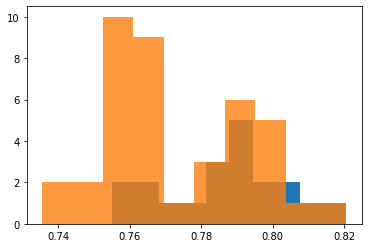

In [54]:
pylab.hist(results2), pylab.hist(results, alpha=0.8)

In [55]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)

test['Cabin_null'] = test['Cabin'].isnull().astype(int)

test['Name_contain_Miss'] = test['Name'].str.contains('Miss').astype(int)
test['Name_contain_Mrs'] = test['Name'].str.contains('Miss').astype(int)
test['Name_contain_Master'] = test['Name'].str.contains('Miss').astype(int)
test['Name_contain_Col'] = test['Name'].str.contains('Miss').astype(int)
test['Name_contain_Major'] = test['Name'].str.contains('Miss').astype(int)
test['Name_contain_Mr'] = test['Name'].str.contains('Miss').astype(int)

model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
model.fit(X, y)

p = model.predict(test[variables].fillna(-1))

## Make submission

In [56]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')


sub.to_csv('submitions/second_model.csv', header=True)